In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import data
Boston_Crime = pd.read_csv('Boston Crime.csv')

In [3]:
# Seeing how many missing values are in each column
Boston_Crime.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [4]:
# Checking the NA values in the dataset
Boston_Crime.isna().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [5]:
# Checking the shape of the data
Boston_Crime.shape

(319073, 17)

In [6]:
# Observing the first 5 rows
Boston_Crime.head()

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA SHOOTING  OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  \
0      D14            808      NaN  02/09/2018 13:00  2018      9      Sunday   
1      C11            347      NaN  21/08/2018 00:00  2018      8     Tuesday   
2       D4            151      NaN  03/09/2018 19:27  2018      9      Monday   
3       D4            272      NaN  03/09/2018 21:16  2018      9      Monday   
4       B3            421      NaN  03/09/2018 21:05  2018      9      Monday   

   HOUR    UCR_PART       STREET        Lat       Long  \
0    13    Part One   LINCOLN ST  42.357791 -71.139371   
1     0    Part Two     HECLA ST  42.306821 -71.060300   
2    19  Part Three  CAZENOVE ST  42.346589 -71.072429   
3    21  Part Three   NEWCOMB ST  42.334182 -71.078664   
4    21  Part Three     DELHI ST  42.275365 -71.090361   

                      Location  
0  (42.35779134, -71.13937053)  
1  (42.30682138, -71.06030035)  
2  (42.34658879, -71.07242943)  
3  (42.33418175, -71.07866441)  
4  (42.27536542, -71.09036101)

In [7]:
# Analysing the years 2017 and 2018
Boston_Crime = Boston_Crime.loc[Boston_Crime['YEAR'].isin([2017,2018])]


# Convert OCCURED_ON_DATE to datetime
Boston_Crime['OCCURRED_ON_DATE'] = pd.to_datetime(Boston_Crime['OCCURRED_ON_DATE'])

# Observing the first 5 rows
Boston_Crime.head()

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA SHOOTING    OCCURRED_ON_DATE  YEAR  MONTH  \
0      D14            808      NaN 2018-02-09 13:00:00  2018      9   
1      C11            347      NaN 2018-08-21 00:00:00  2018      8   
2       D4            151      NaN 2018-03-09 19:27:00  2018      9   
3       D4            272      NaN 2018-03-09 21:16:00  2018      9   
4       B3            421      NaN 2018-03-09 21:05:00  2018      9   

  DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long  \
0      Sunday    13    Part One   LINCOLN ST  42.357791 -71.139371   
1     Tuesday     0    Part Two     HECLA ST  42.306821 -71.060300   
2      Monday    19  Part Three  CAZENOVE ST  42.346589 -71.072429   
3      Monday    21  Part Three   NEWCOMB ST  42.334182 -71.078664   
4      Monday    21  Part Three     DELHI ST  42.275365 -71.090361   

                      Location  
0  (42.35779134, -71.13937053)  
1  (42.30682138, -71.06030035)  
2  (42.34658879, -71.07242943)  
3  (42.33418175, -71.07866441)  
4  (42.27536542, -71.09036101)

In [8]:
# Changing the days of the week column in order
Boston_Crime.DAY_OF_WEEK = pd.Categorical(Boston_Crime.DAY_OF_WEEK, 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)

# Replace -1 values in Lat/Long columns with Nan
Boston_Crime.Lat.replace(-1, None, inplace=True)
Boston_Crime.Long.replace(-1, None, inplace=True)

# Changing the names of the columns, for easier to type
rename = {'OFFENSE_CODE_GROUP':'Group',
         'OFFENSE_DESCRIPTION':'Description',
         'DISTRICT':'District',
         'REPORTING_AREA':'Area',
         'SHOOTING':'Shooting',
         'OCCURRED_ON_DATE':'Date',
         'YEAR':'Year',
         'MONTH':'Month',
         'DAY_OF_WEEK':'Day',
         'HOUR':'Hour',
         'STREET':'Street'}
Boston_Crime.rename(index=str, columns=rename, inplace=True)

# Checking results
Boston_Crime.head()

INCIDENT_NUMBER  OFFENSE_CODE                 Group           Description  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  District Area Shooting                Date  Year  Month      Day  Hour  \
0      D14  808      NaN 2018-02-09 13:00:00  2018      9   Sunday    13   
1      C11  347      NaN 2018-08-21 00:00:00  2018      8  Tuesday     0   
2       D4  151      NaN 2018-03-09 19:27:00  2018      9   Monday    19   
3       D4  272      NaN 2018-03-09 21:16:00  2018      9   Monday    21   
4       B3  421      NaN 2018-03-09 21:05:00  2018      9   Monday    21   

     UCR_PART       Street        Lat       Long                     Location  
0    Part One   LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)  
1    Part Two     HECLA ST  42.306821 -71.060300  (42.30682138, -71.06030035)  
2  Part Three  CAZENOVE ST  42.346589 -71.072429  (42.34658879, -71.07242943)  
3  Part Three   NEWCOMB ST  42.334182 -71.078664  (42.33418175, -71.07866441)  
4  Part Three     DELHI ST  42.275365 -71.090361  (42.27536542, -71.09036101)

In [9]:
# Observing the dataset
Boston_Crime.dtypes
Boston_Crime.isnull().sum()
Boston_Crime.shape

(166571, 17)

Text(0.5, 1.0, 'Type of serious crime reported')

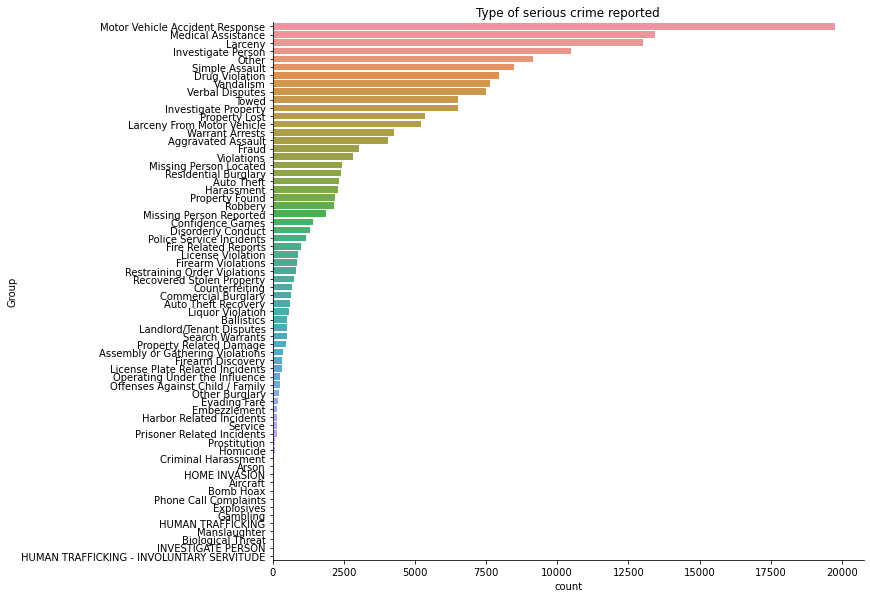

In [10]:
# Analysing the type of serious crime
# Import seaborn
import seaborn as sns
sns.catplot(y='Group',
           kind='count',
            height=8, 
            aspect=1.5,
            order=Boston_Crime.Group.value_counts().index,
           data=Boston_Crime)
plt.title("Type of serious crime reported")

Text(0.5, 1.0, 'Hour of the day the crimes occur')

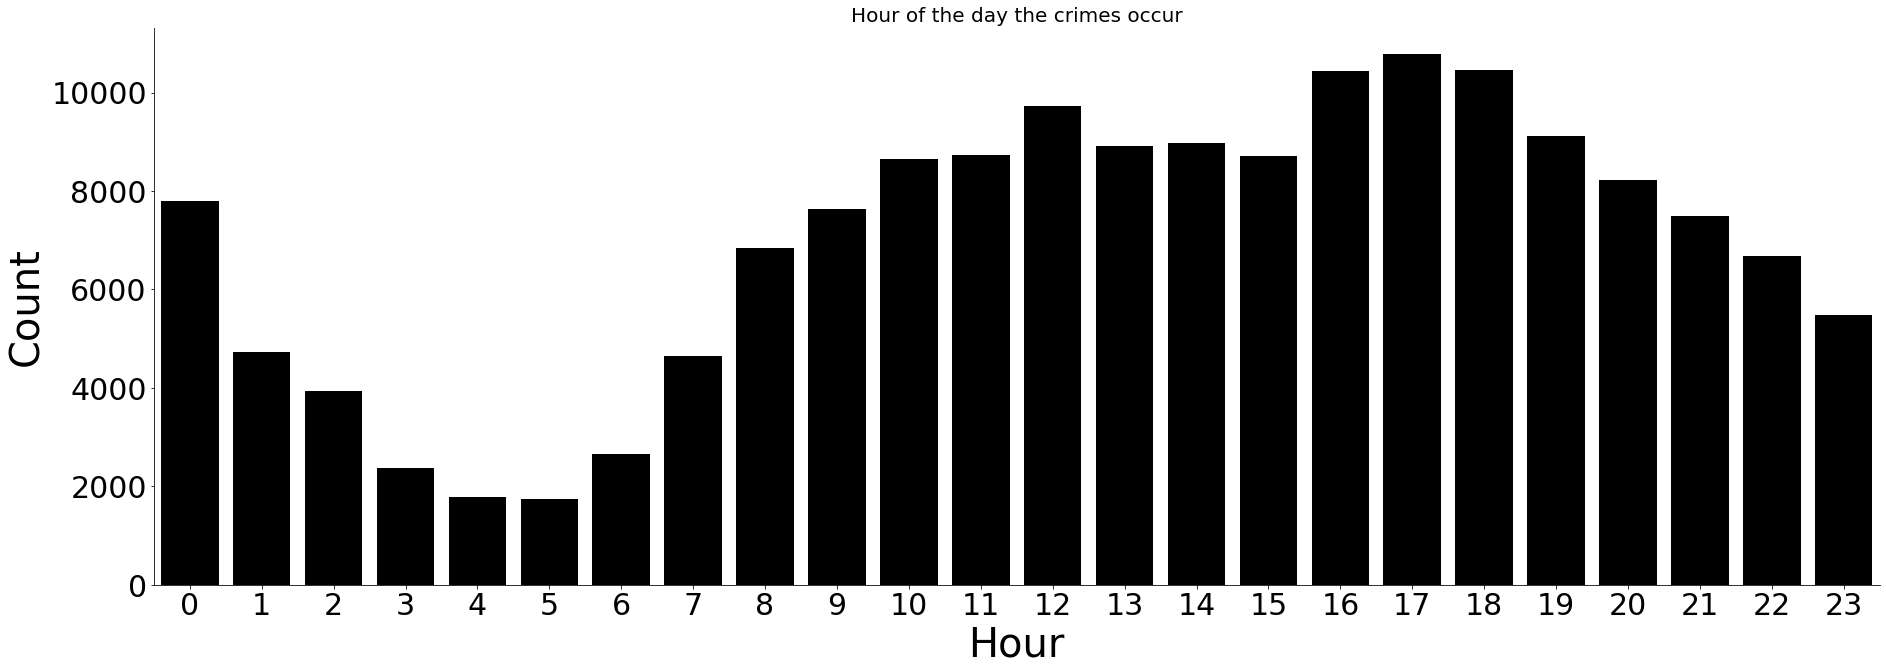

In [11]:
# Time of the day the crimes occur
sns.catplot(x='Hour',
           kind='count',
            height=8.27, 
            aspect=3,
            color='black',
           data=Boston_Crime)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('Hour', fontsize=40)
plt.ylabel('Count', fontsize=40)
plt.title("Hour of the day the crimes occur",fontsize=20)

Text(0.5, 1.0, 'Days of the week the crimes occur')

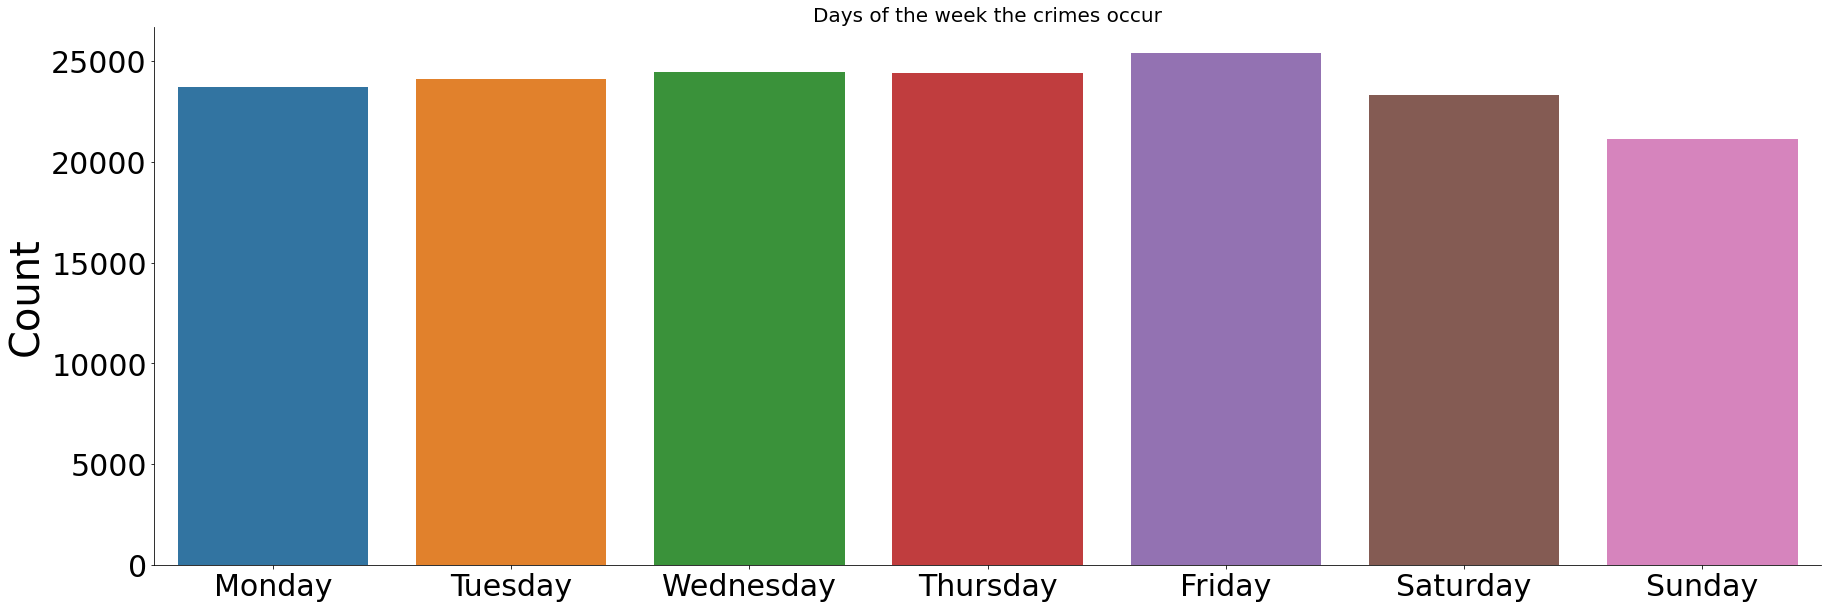

In [12]:
# Days of the week the crimes occur
sns.catplot(x='Day',
           kind='count',
            height=8, 
            aspect=3,
           data=Boston_Crime)
plt.xticks(size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)
plt.title("Days of the week the crimes occur",fontsize=20)

Text(0.5, 1.0, 'Months the crimes occur')

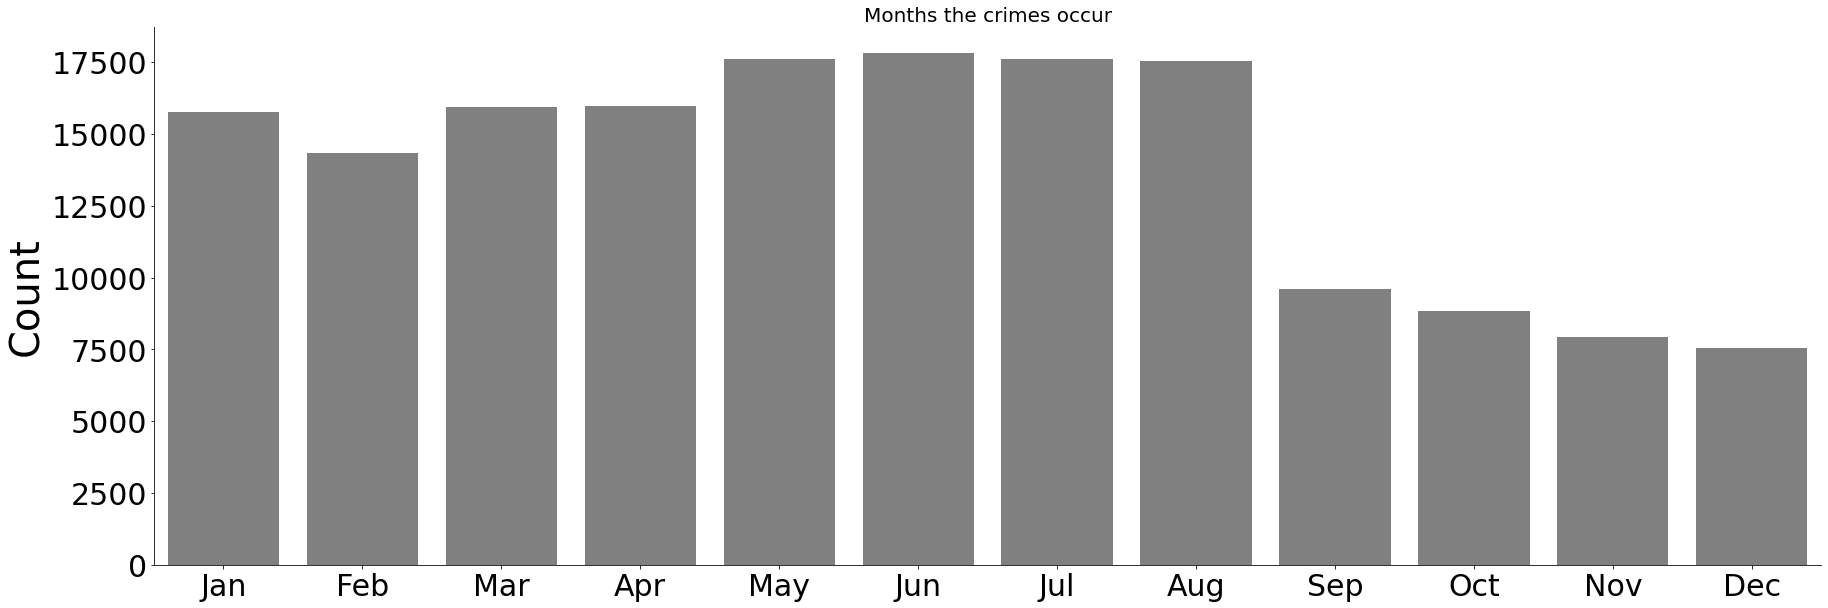

In [13]:
# Months of the year the crimes occur
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.catplot(x='Month',
           kind='count',
            height=8, 
            aspect=3,
            color='gray',
           data=Boston_Crime)
plt.xticks(np.arange(12), months, size=30)
plt.yticks(size=30)
plt.xlabel('')
plt.ylabel('Count', fontsize=40)
plt.title("Months the crimes occur",fontsize=20)

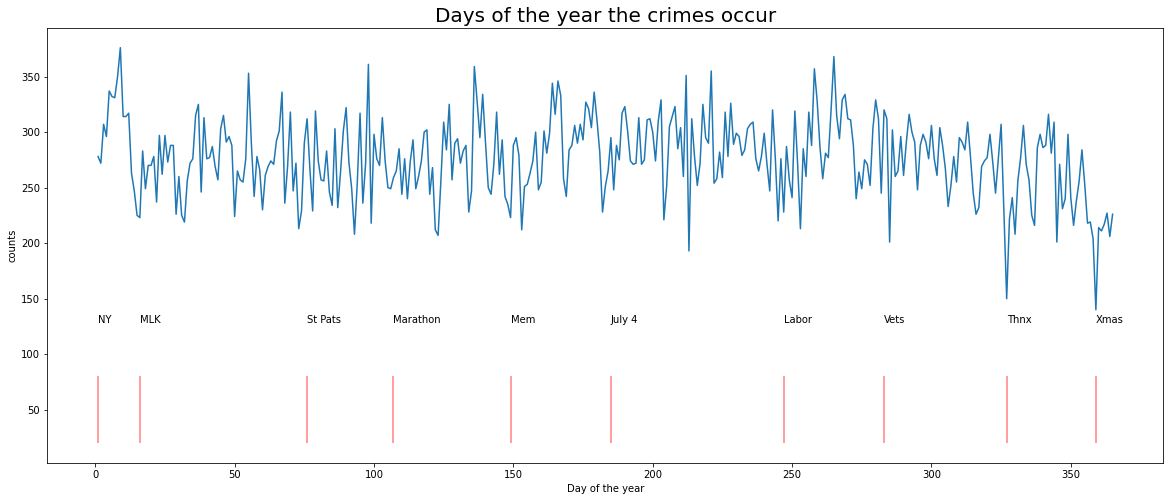

In [14]:
# Create data for plotting
Boston_Crime['Day_of_year'] = Boston_Crime.Date.dt.dayofyear
data_holidays = Boston_Crime[Boston_Crime.Year == 2017].groupby(['Day_of_year']).size().reset_index(name='counts')

# Dates of major U.S. holidays in 2017
holidays = pd.Series(['2017-01-01', # New Years Day
                     '2017-01-16', # MLK Day
                     '2017-03-17', # St. Patrick's Day
                     '2017-04-17', # Boston marathon
                     '2017-05-29', # Memorial Day
                     '2017-07-04', # Independence Day
                     '2017-09-04', # Labor Day
                     '2017-10-10', # Veterans Day
                     '2017-11-23', # Thanksgiving
                     '2017-12-25']) # Christmas
holidays = pd.to_datetime(holidays).dt.dayofyear
holidays_names = ['NY',
                 'MLK',
                 'St Pats',
                 'Marathon',
                 'Mem',
                 'July 4',
                 'Labor',
                 'Vets',
                 'Thnx',
                 'Xmas']

import datetime as dt
# Plot crimes and holidays
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x='Day_of_year',
            y='counts',
            ax=ax,
            data=data_holidays)
plt.xlabel('Day of the year')
plt.vlines(holidays, 20, 80, alpha=0.5, color ='r')
for i in range(len(holidays)):
    plt.text(x=holidays[i], y=128, s=holidays_names[i])
    plt.title("Days of the year the crimes occur",fontsize=20)

Text(0.5, 1.0, 'Longitude and latitude of where the crimes occur')

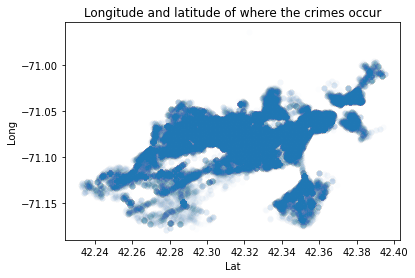

In [15]:
# Plotting the latitude and longitude of the crime
sns.scatterplot(x='Lat',
               y='Long',
                alpha=0.01,
               data=Boston_Crime)
plt.title("Longitude and latitude of where the crimes occur",fontsize=12)

Text(0.5, 1.0, 'Districts the crimes occur')

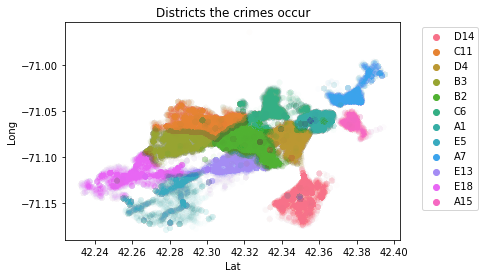

In [16]:
# Where in the districts the crime occurs
sns.scatterplot(x='Lat',
               y='Long',
                hue='District',
                alpha=0.01,
               data=Boston_Crime)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title("Districts the crimes occur",fontsize=12)

In [17]:
import folium
from folium.plugins import HeatMap
# Producing a folium map
crime_map = folium.Map(location=[42.3125,-71.0875], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Inputing data for the heatmap 
data_heatmap = Boston_Crime[Boston_Crime.Year == 2017]
data_heatmap = Boston_Crime[['Lat','Long']]
data_heatmap = Boston_Crime.dropna(axis=0, subset=['Lat','Long'])
data_heatmap = [[row['Lat'],row['Long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

# Plot!
crime_map

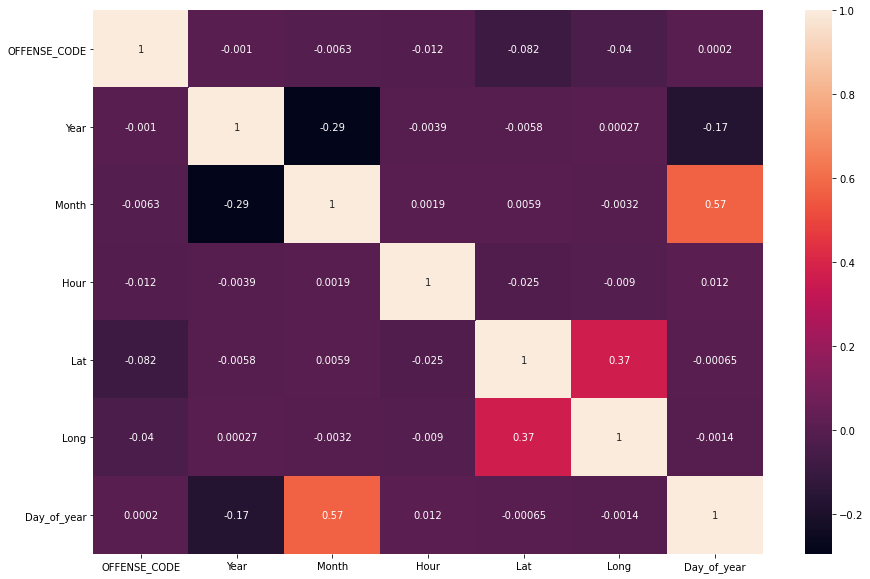

In [18]:
# Correlation matrix for dataset
BostonCrime_corr = pd.DataFrame(Boston_Crime)
plt.figure(figsize=(15, 10))

corrMatrix = BostonCrime_corr.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()




In [19]:
# How many columns
Boston_Crime.shape[1]

18

In [20]:
# row names
Boston_Crime.index.values

array(['0', '1', '2', ..., '319042', '319066', '319067'], dtype=object)

In [21]:
# Name of columns
Boston_Crime.columns.values

array(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'Group', 'Description',
       'District', 'Area', 'Shooting', 'Date', 'Year', 'Month', 'Day',
       'Hour', 'UCR_PART', 'Street', 'Lat', 'Long', 'Location',
       'Day_of_year'], dtype=object)

In [22]:
# Dropping unnecessary columns
Crime_Boston = Boston_Crime.drop(['District', 'Location', 'Street','INCIDENT_NUMBER','Area','Date','Group','Description'], axis=1)
Crime_Boston.head()


OFFENSE_CODE Shooting  Year  Month      Day  Hour    UCR_PART        Lat  \
0           619      NaN  2018      9   Sunday    13    Part One  42.357791   
1          1402      NaN  2018      8  Tuesday     0    Part Two  42.306821   
2          3410      NaN  2018      9   Monday    19  Part Three  42.346589   
3          3114      NaN  2018      9   Monday    21  Part Three  42.334182   
4          3114      NaN  2018      9   Monday    21  Part Three  42.275365   

        Long  Day_of_year  
0 -71.139371           40  
1 -71.060300          233  
2 -71.072429           68  
3 -71.078664           68  
4 -71.090361           68

In [34]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'UCR_PART' column 
encoder_CrimeBoston = pd.DataFrame(encoder.fit_transform(Crime_Boston[['UCR_PART']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_CrimeBoston = Crime_Boston.join(encoder_CrimeBoston)

#view final dataframe
print(final_CrimeBoston)



#view final df
print(final_CrimeBoston)
final_CrimeBoston.head()


        OFFENSE_CODE Shooting  Year  Month        Day  Hour    UCR_PART  \
0                619      NaN  2018      9     Sunday    13    Part One   
1               1402      NaN  2018      8    Tuesday     0    Part Two   
2               3410      NaN  2018      9     Monday    19  Part Three   
3               3114      NaN  2018      9     Monday    21  Part Three   
4               3114      NaN  2018      9     Monday    21  Part Three   
...              ...      ...   ...    ...        ...   ...         ...   
319031          1841      NaN  2017      1     Friday     2    Part Two   
319032          3130      NaN  2017      1     Friday     2  Part Three   
319042          3125      NaN  2018      8  Wednesday    17  Part Three   
319066          1864      NaN  2018      1   Saturday    14    Part Two   
319067          3125      NaN  2018      1   Saturday    14  Part Three   

              Lat       Long  Day_of_year   0   1   2   3   4  
0       42.357791 -71.139371       

OFFENSE_CODE Shooting  Year  Month      Day  Hour    UCR_PART        Lat  \
0           619      NaN  2018      9   Sunday    13    Part One  42.357791   
1          1402      NaN  2018      8  Tuesday     0    Part Two  42.306821   
2          3410      NaN  2018      9   Monday    19  Part Three  42.346589   
3          3114      NaN  2018      9   Monday    21  Part Three  42.334182   
4          3114      NaN  2018      9   Monday    21  Part Three  42.275365   

        Long  Day_of_year   0   1   2   3   4  
0 -71.139371           40 NaN NaN NaN NaN NaN  
1 -71.060300          233 NaN NaN NaN NaN NaN  
2 -71.072429           68 NaN NaN NaN NaN NaN  
3 -71.078664           68 NaN NaN NaN NaN NaN  
4 -71.090361           68 NaN NaN NaN NaN NaN